In [1]:
import mylibrary.nnlib as nn

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Least squares

In [3]:
def regression(x,y):
    n = len(x)
    sy = np.sum(y)
    sx = np.sum(x)
    sx2 = np.sum(np.square(x))
    sxy = np.sum(x*y)

    # y = mx+c
    z = (n*sx2 - sx**2)
    m = (n*sxy - sx*sy)/z
    c = (sy*sx2 - sx*sxy)/z
    return m, c

def output(x, m, c):
    return m*x+c

def error(target, output):
    return np.sqrt(np.square(target-output).mean())

In [4]:
#Define a simple range of values for x and reshape so sklearn likes it.
x = np.linspace(0,1,200)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
y= 2.5*x + 5
noise = np.random.normal(0,0.1, x.shape)
y = y + noise
x = x + 0.5

In [5]:
n = len(x)

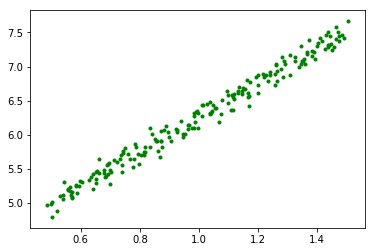

In [6]:
plt.scatter(x, y, marker='.', color='g')

In [7]:
m = np.random.exponential()*2
c = np.random.randn()
mt, mr = np.copy(m), np.copy(m)
ct, cr = np.copy(c), np.copy(c)
m,c

(2.8788738772813893, 0.3083559675548679)

In [8]:
m, c = regression(x, y)
ytarg = m*x+c
learning_rate = 0.3

m, c

(2.5099223573850638, 3.7474044282727763)

In [9]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.ion()
fig.show()
fig.canvas.draw()


for step in range(100):
    # traditional first
    yt = mt*x + ct
    dyt = yt - y
    dct = dyt.mean()
    dmt = x.T.dot(dyt)/n
    
    yr = mr*x + cr
    dyr = yr - y
    dcr = dyr.mean()
    dmr = (1/x).T.dot(dyr)/n
    
    print('_______________________')
    print("epoch trad, rev", step)
    print("m  c", m, c)
    print("mt mr", mt, mr)
    print("ct cr", ct, cr)
    print("Loss", (dyt**2).mean(), (dyr**2).mean())
    print("dm  ", dmt, dmr)
    print("dc  ", dct, dcr)
    
    
    mt = mt - learning_rate*dmt
    ct = ct - learning_rate*dct
    mr = mr - learning_rate*dmr
    cr = cr - learning_rate*dcr
###     the revised version does not seem to require learning rate
#     mr = mr - dmr
#     cr = cr - dcr

    

    ax.clear()
    plt.scatter(x, y, marker='.', c='g', label='x,y')
    plt.scatter(x, ytarg, marker='*', c='r', lw=1, label='x,ytarg')
    plt.scatter(x, yt, marker='.', c='m', lw=1, label='x,yt')
    plt.scatter(x, yr, marker='.', c='purple', lw=1, label='x,yr')
#     plt.plot(x, np.zeros_like(x), c='b', lw=1)

    plt.legend()
    fig.canvas.draw()
    
    plt.pause(1)
    
    print("\n")
    if (dyt**2).mean() < 0.0025:
        print('fitted to our expectation')
        plt.pause(10)
        break

_______________________
epoch trad, rev 0
m  c 2.5099223573850638 3.7474044282727763
mt mr 2.8788738772813893 2.8788738772813893
ct cr 0.3083559675548679 0.3083559675548679
Loss 9.447746478314377 9.447746478314377
dm   -3.037967035718774 -3.415549522617099
dc   -3.0702222919420374 -3.0702222919420374


_______________________
epoch trad, rev 1
m  c 2.5099223573850638 3.7474044282727763
mt mr 3.7902639879970215 3.903538734066519
ct cr 1.2294226551374792 1.2294226551374792
Loss 1.6814733673078772 1.4395295317420391
dm   -1.1293415881016486 -1.3772606862614598
dc   -1.2380751380425665 -1.124838877019407


_______________________
epoch trad, rev 2
m  c 2.5099223573850638 3.7474044282727763
mt mr 4.129066464427516 4.316716939944957
ct cr 1.600845196550249 1.5668743182433014
Loss 0.5104946020302354 0.42627034527154756
dm   -0.3908113034541308 -0.5927205559085441
dc   -0.5279652281951904 -0.3743493851531786


_______________________
epoch trad, rev 3
m  c 2.5099223573850638 3.7474044282727763

TclError: can't invoke "update" command: application has been destroyed

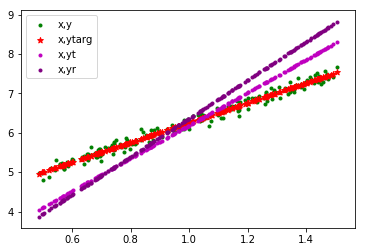

In [10]:
%matplotlib inline
plt.scatter(x, y, marker='.', c='g', label='x,y')
plt.scatter(x, ytarg, marker='*', c='r', lw=1, label='x,ytarg')
plt.scatter(x, yt, marker='.', c='m', lw=1, label='x,yt')
plt.scatter(x, yr, marker='.', c='purple', lw=1, label='x,yr')
plt.legend()

In [52]:
# Debugging
print('trad       rev')

trad       rev


In [55]:
print(dmt, dmr)
print(dct, dcr)

0.0016102826616787697 8.104628079763643e-17
-2.525687237872054e-06 4.440892098500626e-18


In [54]:
t, r = dyt, dyr
print('delta y')
print('min',t.min(), r.min())
print('max',t.max(), r.max())
print('mean',t.mean(), r.mean())
print('std',t.std(), r.std())

delta y
min -0.624957323707748 -0.6074311412986966
max 0.7899148919240455 0.85819853213987
mean -2.525687237872054e-06 4.440892098500626e-18
std 0.3005932225263603 0.3024809834079397


In [29]:
et, er = dyt**2, dyr**2
print('squared error')
print('min',et.min(), er.min())
print('max',et.max(), er.max())
print('mean',et.mean(), er.mean())
print('std',t.std(), r.std())

squared error
min 1.1255359769283872e-06 5.636025819552769e-06
max 1.1944483169820428 0.7365047192822285
mean 0.1878990296418823 0.09149474529513978
std 0.43347319313821475 0.30248098336116896


In [56]:
dyt - dyr

array([-0.06508499, -0.06781433, -0.06684634, -0.0649274 , -0.06811784,
       -0.06828364, -0.06495388, -0.06174709, -0.06393613, -0.06011415,
       -0.06042471, -0.06018784, -0.05670567, -0.05724259, -0.05537119,
       -0.0588654 , -0.05708255, -0.05705549, -0.0547389 , -0.0560075 ,
       -0.05358643, -0.055201  , -0.0560618 , -0.05361213, -0.05650175,
       -0.04738161, -0.05224138, -0.05092768, -0.0541107 , -0.04980656,
       -0.04395611, -0.04824204, -0.04652913, -0.04728562, -0.04389452,
       -0.04695855, -0.0393718 , -0.04118419, -0.03951263, -0.04199678,
       -0.03811618, -0.04025349, -0.03839123, -0.03884803, -0.03826318,
       -0.03897731, -0.04061796, -0.03232919, -0.03580051, -0.0376803 ,
       -0.03697773, -0.03022207, -0.03564742, -0.03210531, -0.02678006,
       -0.03011371, -0.03393446, -0.02572166, -0.02729112, -0.02792142,
       -0.02917394, -0.03294486, -0.02528482, -0.01988932, -0.02334827,
       -0.02741709, -0.01962705, -0.02599032, -0.02342842, -0.02

In [67]:
dyt

array([ 0.59122199,  0.71352514,  0.68863094,  0.63370291,  0.77697184,
        0.78991489,  0.53699317,  0.34350218,  0.39271115,  0.06071922,
        0.13030571,  0.15792506,  0.00712418, -0.04670769, -0.18911831,
        0.03029134, -0.25102079, -0.01256854, -0.26295941, -0.04434352,
       -0.27647846, -0.10770147, -0.08214007, -0.28057435, -0.13331359,
       -0.47108617, -0.35355072, -0.38926876, -0.18209061, -0.3337984 ,
       -0.42501648, -0.46429267, -0.62495732, -0.46441271, -0.48762172,
       -0.48334029, -0.24554094, -0.39658846, -0.22484493, -0.23860037,
       -0.14523144, -0.33312003, -0.17184407, -0.29487598, -0.39228769,
       -0.14988748, -0.35079979, -0.10863182, -0.41274893, -0.39439755,
       -0.268219  , -0.0325961 , -0.29321089, -0.01346012,  0.11806263,
        0.09924583, -0.25776522, -0.03769409,  0.0703856 , -0.03401712,
        0.08351349, -0.11951421,  0.35695323,  0.14306839,  0.17537823,
        0.08652535,  0.15046066,  0.03264144,  0.24771756,  0.16

In [68]:
dyr

array([ 0.65630697,  0.78133947,  0.75547727,  0.69863031,  0.84508968,
        0.85819853,  0.60194704,  0.40524927,  0.45664728,  0.12083337,
        0.19073043,  0.2181129 ,  0.06382985,  0.0105349 , -0.13374711,
        0.08915674, -0.19393824,  0.04448695, -0.20822051,  0.01166398,
       -0.22289203, -0.05250046, -0.02607827, -0.22696222, -0.07681185,
       -0.42370457, -0.30130933, -0.33834108, -0.12797991, -0.28399184,
       -0.38106037, -0.41605063, -0.57842819, -0.41712709, -0.44372719,
       -0.43638174, -0.20616914, -0.35540427, -0.1853323 , -0.19660359,
       -0.10711525, -0.29286654, -0.13345284, -0.25602795, -0.35402452,
       -0.11091017, -0.31018183, -0.07630262, -0.37694842, -0.35671725,
       -0.23124126, -0.00237403, -0.25756347,  0.01864519,  0.14484269,
        0.12935954, -0.22383076, -0.01197243,  0.09767672, -0.00609571,
        0.11268743, -0.08656936,  0.38223805,  0.16295771,  0.1987265 ,
        0.11394244,  0.17008771,  0.05863176,  0.27114598,  0.18

## Works but does poor when close to minima.. WHYYY ??

In [57]:
dmt_ = x.T.dot(dyt)/n
dmr_ = (1/x).T.dot(dyr)/n
dmr__ = x.T.dot(dyr)/n

In [59]:
dmr__

-0.009984470628819605

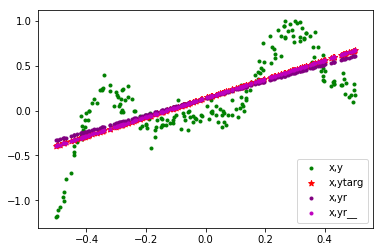

In [66]:
yr__ = (mr - 12*dmr__)*x + cr

plt.scatter(x, y, marker='.', c='g', label='x,y')
plt.scatter(x, ytarg.reshape(-1), marker='*', c='r', lw=1, label='x,ytarg')
plt.scatter(x, yr.reshape(-1), marker='.', c='purple', lw=1, label='x,yr')
plt.scatter(x, yr__.reshape(-1), marker='.', c='m', lw=1, label='x,yr__')
plt.legend()